# Mercado de Deuda

## Bonos

In [1]:
class Bono (object):
    """
    # P: Precio del Bono
    # F: Valor Nominal, Face Value, Par Value
    # C: Valor de Redencion
    # r: tasa efectiva de pago de cupones
    # F*r: Monto del Cupon
    # g: tasa de Cupon Modificada, g = (F*r) / C
    # i: tasa de Interes del bono efectiva
    # n: numero de pago de cupones
    # K: Valor Presente del valor de Redencion C, K = C / (1+i)^n
    # G: cantidad Base, G = (F*r) / i

    # Valor Presente: V_n = 1 / (1+i)**n
    # Anualidad: a_n = (1 - V_n) / i

    Opciones para el calculo del Precio del Bono:
        1 - Formula Basica:               P = (F*r * a_n) + (C * V_n)
        2 - Formula Prima - Descuento:    P = C + (F*r - C * i)*a_n
        3 - Formula Cantidad Base:        P = G + (C - G)*V_n
        4 - Formula de Makeham:           P = K + (g/i)*(C - K)
    """""
    def __init__(self, **kwargs):
        self.opcion = 0
        self.F = 0
        self.C = 0
        self.r = 0
        self.g = 0
        self.i = 0
        self.n = 0
        if "opcion" in kwargs:
            self.opcion = kwargs["opcion"]
        if "F" in kwargs:
            self.F = kwargs["F"]
        if "C" in kwargs:
            self.C = kwargs["C"]
        else:
            self.C = self.F
        if "r" in kwargs:
            self.r = kwargs["r"]
        if "g" in kwargs:
            self.g = kwargs["g"]
        if "i" in kwargs:
            self.i = kwargs["i"]
        if "n" in kwargs:
            self.n = kwargs["n"]

    def precio_bono(self):
        try:
            if (self.opcion == 1) or (self.opcion == 2) or (self.opcion == 3) or (self.opcion == 4):

                V_n = 1 / (1 + self.i)**self.n
                a_n = (1 - V_n) / self.i

                self.g = (self.F * self.r) / self.C
                self.K = self.C * V_n
                self.G = (self.F * self.r) / self.i

                match self.opcion:
                    case 1:
                        # Formula Basica
                        print("Precio del Bono por Formula Basica:")
                        P = (self.F * self.r * a_n) + (self.C * V_n)
                    case 2:
                        # Formula Prima - Descuento
                        print("Precio del Bono por Formula Prima - Descuento:")
                        P = self.C + ((self.F * self.r) - (self.C * self.i)) * a_n
                    case 3:
                        # Formula Cantidad Base
                        print("Precio del Bono por Formula Cantidad Base")
                        P = self.G + (self.C - self.G) * V_n
                    case 4:
                        # Formula de Makeham
                        print("Precio del Bono por Formula de Makeham")
                        P = self.K + (self.g / self.i) * (self.C - self.K)
                return P
            else:
                raise ValueError("Elegir una opcion 1 a 4")
        except ValueError as e:
            print(f"Error: {e}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")


Ejercicio sobre Calculo del Precio de un Bono (P) y Rendimientos:

In [13]:
# Un Bono a 10 anios tiene una tasa de cupones de 10% convertible semestralmente, el valor nominal es de $100 y se redime a $105. Determine el precio del bono a una tasa del 8% convertible semestralmente.
bono_1 = Bono(opcion = 2, n = 10*2, r = 0.10/2, F = 100, C = 105, i = 0.08/2)
P = Bono.precio_bono(bono_1)
P

Precio del Bono por Formula Prima - Descuento:


115.87226107597415

In [3]:
# Para el bono del ejemplo anerior, detemine:

# a) El rendimiento nominal basado en el valor nominal (Face Value).  Rendimineto Nominal no considera inflacion, intereses, mercado.
# b) El rendimiento nominal basado en el valor de redencion (C).      Rendimineto Nominal no considera inflacion, intereses, mercado.
# c) El rendimiento actual ("Current") o de Mercado (P)               Este si roma factores de mercado e intereses incluidos en el Precio P)
# d) El rendimiento a la madurez (YTM)

In [ ]:
# Todo va Multiplicado por (2) porque son cupones semestrales en el ejercicio de arriba

# a) 10%
# Valor anualizado del cupon = 2 * F * r = 2 * 5 = 10
sol = (2 * bono_1.F * bono_1.r) / bono_1.F  # = 10/100 = 10% rendimiento nominal respecto del Valor nominal del coupon o Face Value
print(f"Rendimiento nominal respecto del Valor nominal o Face Value del coupon: {round(sol * 100, 2)}%")

# b) 9.52%
# (2 * F * r) / C = 10/105 = 9.52% rendimiento nominal respecto del Valor de Redencion (tasa de cupon modificada) La proporcion que representa el cupon sobre el valor final del bono o redencion = 2 * g
sol = (2 * bono_1.F * bono_1.r) / bono_1.C
print(f"Rendimiento nominal respecto del Valor de Redencion: {round(sol * 100, 2)}%")

# c) 8.63%
# 2 * F * r / P = 10/115.87 = 8.63%  Rendimiento de Mercado o Current. EL precio P ya incluye Intereses.
sol = (2 * bono_1.F * bono_1.r) / P
print(f"Rendimiento de Mercado o Current: {round(sol * 100, 2)}%")

# d) 8%
# 2 * i = 2 * 4% = 8% Rendmiento a la Madurez o total del Bono, YTM
sol = (2 * bono_1.i)
print(f"Rendmiento a la Madurez o Rendimiento total del Bono o YTM: {round(sol * 100, 2)}%")



Rendimiento nominal respecto del Valor nominal o Face Value del coupon: 10.0%
Rendimiento nominal respecto del Valor de Redencion: 9.52%
Rendimiento de Mercado o Current: 8.63%
Rendmiento a la Madurez o Rendimiento total del Bono o YTM: 8.0%


Ejercicio 3. Bono Andrew.

# Modulo 3: Curvas de Tasas de Interes "Yield Curve" and Spot Rates

In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy_financial as npf

   Plazo  Spot_rate
0      1     0.0700
1      2     0.0800
2      3     0.0875
3      4     0.0925
4      5     0.0950


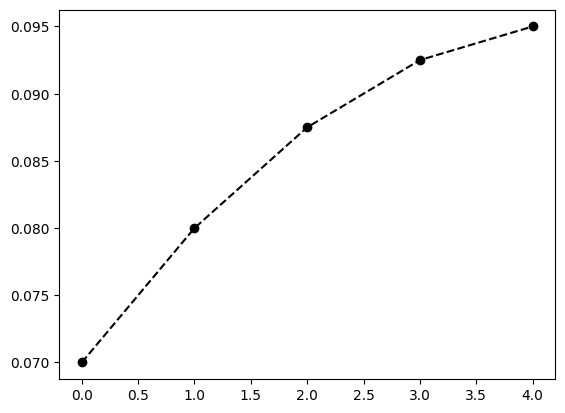

a) VPN = $ 3906.63
b) Effective Interest rate (IRR) o Tasa Anual Efectiva que produce el mismo VPN es:  8.8324 %


In [137]:
# Ejercicio 13

d = {
    'Plazo':[1, 2, 3, 4, 5], 
     'Spot_rate':[0.07, 0.08, 0.0875, 0.0925, 0.095]
     }

spot_rates = pd.DataFrame(data = d)
print(spot_rates)

fig, ax = plt.subplots()
ax.plot(spot_rates['Spot_rate'], color='black', linestyle='--', marker='o', mouseover=False)
plt.show()

# a) Determine el valor presente neto de pagos de 1000 al ﬁnal de cada año durante 5 años usando tasas Spot.

suma = 0
for i in range(len(spot_rates)):
    suma = ((1 + spot_rates['Spot_rate'].iloc[i]) ** (-(i+1)) ) + suma
VPN = 1000 * suma
print("a) VPN = $",round(VPN,2))


# b) ¿Cual es la tasa anual efectiva que produce el mismo VPN?

cash_flows = [-VPN, 1000, 1000, 1000, 1000, 1000] # Initial Investment and Cash Flows
irr = npf.irr(cash_flows) # effective interest rate at which the annuity's NPV becomes zero. Annuity's value equal to its cost
print(f"b) Effective Interest rate (IRR) o Tasa Anual Efectiva que produce el mismo VPN es: ", round(irr*100,4), "%") # Ver solucion con Excel (solver) tambien.
